In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [90]:
import sklearn
from sklearn import datasets
from sklearn.base import BaseEstimator, TransformerMixin
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans


from giotto.mapper.cover import OneDimensionalCover, CubicalCover
from giotto.mapper.mapper import make_mapper_pipeline

import kmapper as km
from kmapper.plotlyviz import plotlyviz

import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot

## Helper functions and classes

In [14]:
class Projection(BaseEstimator, TransformerMixin):
    def __init__(self, dimension):
        self.dimension = dimension
        
    def fit(self, X, y=None): 
        return self
    
    def transform(self, X, y=None):
        return X[:,self.dimension].reshape(-1,1)

## Circles example

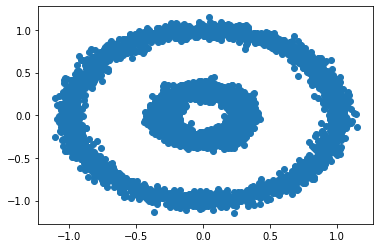

In [3]:
data, labels = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.3)

plt.scatter(data[:,0], data[:, 1]);

In [4]:
# Initialize
mapper = km.KeplerMapper(verbose=0)

# Fit to and transform the data
lens = mapper.fit_transform(data, projection=[0])

# Create dictionary called 'simplicial_complex' with nodes, edges and meta-information
simplicial_complex = mapper.map(lens, X=data,
                                cover=km.Cover(n_cubes=20, perc_overlap=0.1))

In [5]:
simplicial_complex.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

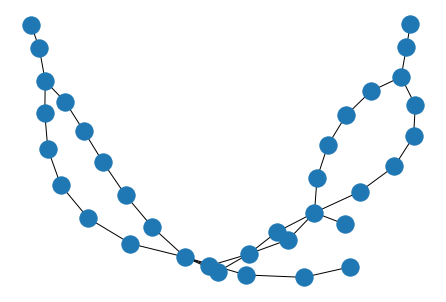

In [11]:
nx_graph = km.adapter.to_nx(simplicial_complex)
nx.draw(nx_graph)

In [7]:
plotlyviz(simplicial_complex, title="Basic plot")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width':…

In [8]:
plotlyviz(simplicial_complex, title="Dashboard plot", dashboard=True)

    'data': [{'hoverinfo': 'none',
              'line': {'color'…

In [9]:
plotlyviz(simplicial_complex, title="Dashboard plot", graph_data=True)

    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,…

In [10]:
plotlyviz(simplicial_complex, graph_layout='fr', title='Kepler-Mapper graph for circles dataset with<br> Fruchtenberg-Reingold layout')

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width':…

In [210]:
simplicial_complex.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

## Giotto

In [19]:
filter_func = Projection(dimension=0)
cover = OneDimensionalCover(n_intervals=20, overlap_frac=0.1)
clusterer = DBSCAN(eps=0.5)

In [264]:
n_jobs_outer = 1

pipe = make_mapper_pipeline(filter_func=filter_func,
                            cover=cover,
                            clusterer=clusterer,
                            verbose=True,
                            n_jobs_outer=n_jobs_outer)

In [265]:
graph = pipe.fit_transform(data)

[Pipeline] ....... (step 1 of 2) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


/usr/local/anaconda3/envs/giotto-dev/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning:

Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.



In [266]:
graph.nodes()

NodeView(((0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (9, 0), (9, 1), (10, 0), (11, 0), (11, 1), (12, 0), (13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (18, 0), (19, 0)))

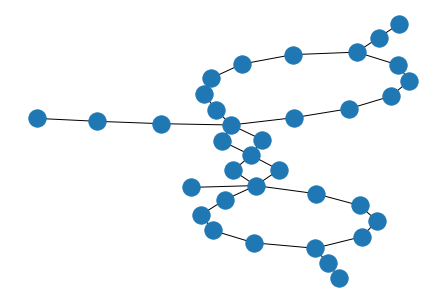

In [267]:
nx.draw(graph, pos=nx.kamada_kawai_layout(graph))

## Plotly approach

In [195]:
pos=nx.kamada_kawai_layout(graph)

In [228]:
node_x=[pos[k][0] for k in graph.nodes()]
node_y=[pos[k][1] for k in graph.nodes()]
edge_x=[]
edge_y=[]
for edge in E:
    edge_x+=[pos[edge[0]][0],pos[edge[1]][0], None]
    edge_y+=[pos[edge[0]][1],pos[edge[1]][1], None]

In [229]:
edge_trace=go.Scatter(x=edge_x,
               y=edge_y,
               mode='lines',
               line=dict(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
node_trace=go.Scatter(x=node_x,
               y=node_y,
               mode='markers',
               name='net',
               marker=dict(symbol='circle-dot',
                             size=5,
                             color='#6959CD',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )

In [230]:
width=600
height=600
layout=go.Layout(title= "Two Circles, One Mapper",
    font= dict(size=12),
    showlegend=True,
    autosize=False,
    width=width,
    height=height,
    hovermode='closest'
    )

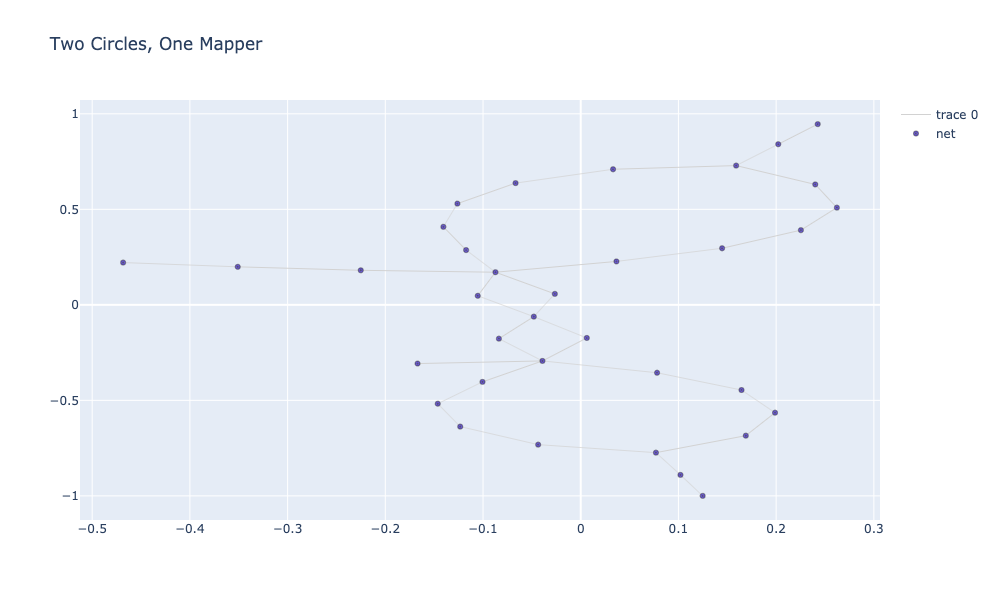

In [231]:
data1=[edge_trace, node_trace]
fig1=go.Figure(data=data1, layout=layout)
fig1.show()